# <span style="color:#FA8072"> Table of Contents </span>
* [1. Summary of Business Task](#summary_1)
* [2. Description of Sources](#description_2)
* [3. Documentation of cleaning of data](#cleaning_3)
* [4. Summary of Analysis](#analysis_4)

# <span style="color:#FA8072"> 1. Summary of Business Task</span> <a class="anchor" id="summary_1"></a>

Bellabeat is a technology company that specializes in designing and producing health-oriented smart devices for women. The company has developed a range of wearable devices and apps that track various aspects of women's health, such as fitness, sleep, stress, and menstrual cycles. The company also offers a subscription plan that provides users with personalized health and wellness guidance based on their data, as well as access to exclusive content, challenges, and rewards.

We aim to identify trends in how consumers use non-Bellabeat smart devices.

Stakeholders:

* Urška Sršen - Bellabeat cofounder and Chief Creative Officer
* Sando Mur - Bellabeat cofounder and key member of Bellabeat executive team
* Bellabeat Marketing Analytics team

# <span style="color:#FA8072"> 2. Description of Sources </span> <a class="anchor" id="description_2"></a>

The datasets that we used in our study are the following:

* FitBit Fitness Tracker Data

This data is stored in Kaggle and was made available through Mobius. The Data is of public domain meaning we can copy, modify, distribute and perform the work, even for commercial purposes, without asking for permission. The Data is reliable, original and credible. The sample size is small and the author does not specify the demographics of the participants which could lead to a sampling bias. The dataset has not been updated since 2016, so it is not current. 

* Apple Watch and Fitbit Data

This data is stored in Kaggle and made available through Espinosa. This data was collected as a part of a Harvard Dataset and is cited.

Fuller, Daniel, 2020, "Replication Data for: Using machine learning methods to predict physical activity types with Apple Watch and Fitbit data using indirect calorimetry as the criterion.", https://doi.org/10.7910/DVN/ZS2Z2J, Harvard Dataverse, V1

The dataset is reliable, original, credible and comprehensive. The data was collected in 2020 and has not been updated, therefore it is not current.

# <span style="color:#FA8072"> 3. Documentation of cleaning of Data </span> <a class="anchor" id="cleaning_3"></a>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")

heartrate = pd.read_csv("heartrate_seconds_merged.csv")
hourly_calories = pd.read_csv("hourlyCalories_merged.csv")
hourly_intensities = pd.read_csv("hourlyIntensities_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")

minute_calories_narrow = pd.read_csv("minuteCaloriesNarrow_merged.csv")
minute_calories_wide = pd.read_csv("minuteCaloriesWide_merged.csv")
minute_intensities_narrow = pd.read_csv("minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide = pd.read_csv("minuteIntensitiesWide_merged.csv")
minuteMETsNarrow = pd.read_csv("minuteMETsNarrow_merged.csv")
minutes_sleep = pd.read_csv("minuteSleep_merged.csv")
minute_steps_narrow = pd.read_csv("minuteStepsNarrow_merged.csv")
minute_steps_wide = pd.read_csv("minuteStepsWide_merged.csv")

sleep_day = pd.read_csv("sleepDay_merged.csv")
weight_log_info = pd.read_csv("weightLogInfo_merged.csv")
aw_fb_data = pd.read_csv("aw_fb_data.csv")

### Daily activities
- Contains the steps, distance, how moderate the active was and for how many minutes, calories
- 33 users 31 days
- combination of daily_calories, daily_intensities, daily steps tables
- There aren't any null values

In [2]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [3]:
print(len(daily_activity['Id'].unique()))
print(len(daily_activity['ActivityDate'].unique()))

33
31


### Daily Activity Wide

In [4]:
daily_activity_wide = pd.pivot(daily_activity, index=['Id'], columns = 'ActivityDate',values = 'TotalSteps') #Reshape from long to wide
daily_activity_wide.isnull().sum()

ActivityDate
4/12/2016     0
4/13/2016     0
4/14/2016     0
4/15/2016     0
4/16/2016     1
4/17/2016     1
4/18/2016     1
4/19/2016     1
4/20/2016     1
4/21/2016     1
4/22/2016     1
4/23/2016     1
4/24/2016     1
4/25/2016     1
4/26/2016     1
4/27/2016     1
4/28/2016     1
4/29/2016     1
4/30/2016     2
5/1/2016      3
5/10/2016     7
5/11/2016     9
5/12/2016    12
5/2/2016      4
5/3/2016      4
5/4/2016      4
5/5/2016      4
5/6/2016      4
5/7/2016      4
5/8/2016      6
5/9/2016      6
dtype: int64

- Let's replace the null values with 0

In [5]:
daily_activity_wide = daily_activity_wide.fillna(0)

### Weight log
- weight_log_info has only 8 users data and therefore we will ignore it from our analysis

In [6]:
weight_log_info.Id.unique()

array([1503960366, 1927972279, 2873212765, 4319703577, 4558609924,
       5577150313, 6962181067, 8877689391], dtype=int64)

### Sleepday
- split the SleepDay column into Date and Time

In [7]:
s = sleep_day.SleepDay.str.split(" ").to_frame()
sleep_day["Date"] = s['SleepDay'].str[0]
sleep_day["Time"] = s['SleepDay'].str[1]
sleep_day = sleep_day.drop(['SleepDay'], axis = 1)
cols = sleep_day.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-2]
sleep_day = sleep_day[cols]
sleep_day.isnull().sum()

Id                    0
Date                  0
Time                  0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [8]:
sleep_day

,Id,Date,Time,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016,12:00:00,1,327,346
1,1503960366,4/13/2016,12:00:00,2,384,407
2,1503960366,4/15/2016,12:00:00,1,412,442
3,1503960366,4/16/2016,12:00:00,2,340,367
4,1503960366,4/17/2016,12:00:00,1,700,712
...,...,...,...,...,...,...
408,8792009665,4/30/2016,12:00:00,1,343,360
409,8792009665,5/1/2016,12:00:00,1,503,527
410,8792009665,5/2/2016,12:00:00,1,415,423
411,8792009665,5/3/2016,12:00:00,1,516,545


### Heart rate
- heartrate has only 14 users so we will not use it in our analysis

In [9]:
heartrate.Id.unique()

array([2022484408, 2026352035, 2347167796, 4020332650, 4388161847,
       4558609924, 5553957443, 5577150313, 6117666160, 6775888955,
       6962181067, 7007744171, 8792009665, 8877689391], dtype=int64)

### Hourly_steps, Hourly_intesities, Hourly_calories

- Merged all the hourly data and split the date time column
- There aren't any null values

In [10]:
merged = pd.merge(right=hourly_steps, left=hourly_calories)
merged = pd.merge(right=merged, left = hourly_intensities)
m = merged.ActivityHour.str.split(" ").to_frame()
merged["Date"] = m['ActivityHour'].str[0]
merged["Time"] = m['ActivityHour'].str[1]
merged = merged.drop(['ActivityHour'], axis = 1)
cols = merged.columns.tolist()
cols = cols[:1] + cols[-2:] + cols[1:-2]
merged = merged[cols]
merged

,Id,Date,Time,TotalIntensity,AverageIntensity,Calories,StepTotal
0,1503960366,4/12/2016,12:00:00,20,0.333333,81,373
1,1503960366,4/12/2016,1:00:00,8,0.133333,61,160
2,1503960366,4/12/2016,2:00:00,7,0.116667,59,151
3,1503960366,4/12/2016,3:00:00,0,0.000000,47,0
4,1503960366,4/12/2016,4:00:00,0,0.000000,48,0
...,...,...,...,...,...,...,...
22094,8877689391,5/12/2016,10:00:00,12,0.200000,126,514
22095,8877689391,5/12/2016,11:00:00,29,0.483333,192,1407
22096,8877689391,5/12/2016,12:00:00,93,1.550000,321,3135
22097,8877689391,5/12/2016,1:00:00,6,0.100000,101,307


### Apple Watch Fitbit Data
- Drop the first two columns
- No null values

In [11]:
# Don't use minute data
aw_fb_data = aw_fb_data.drop(['Unnamed: 0', 'X1'], axis=1)
aw_fb_data

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


In [12]:
aw_fb_data['gender'].value_counts()

0    3279
1    2985
Name: gender, dtype: int64

In [13]:
aw_fb_data.shape

(6264, 18)

In [14]:
# Drop duplicate columns
aw_fb_data[aw_fb_data.duplicated()]

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
5081,37,1,183.0,115.0,1.0,155.0,75.0,1.0,0.106792,0.106792,155.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Running 7 METs
5082,37,1,183.0,115.0,1.0,155.0,75.0,1.0,0.106792,0.106792,155.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Running 7 METs
5085,18,1,180.3,90.0,1.0,3.0,3.5,1.0,0.104419,0.000000,3.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Lying
5087,18,1,180.3,90.0,1.0,3.0,3.5,1.0,0.104419,0.000000,3.0,1.0,0.0,0.0,24.033310,1.0,fitbit,Lying
5305,48,1,170.0,88.0,1.0,139.0,20.5,1.0,0.097941,0.000000,139.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Running 7 METs
5306,48,1,170.0,88.0,1.0,139.0,20.5,1.0,0.097941,0.000000,139.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Running 7 METs
5310,20,1,184.0,77.3,1.0,4.0,4.0,1.0,0.519311,0.104419,4.0,1.0,0.0,0.0,21.345374,1.0,fitbit,Lying
6261,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs
6262,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs
6263,46,0,157.5,71.4,1.0,35.0,20.5,1.0,0.000000,0.000000,35.0,1.0,0.0,0.0,1.000000,1.0,fitbit,Running 7 METs


In [15]:
aw_fb_data = aw_fb_data.drop_duplicates(keep='first')

In [16]:
aw_fb_data.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

##### Cleaned Datasets that we will use
- daily_activity
- daily_activity_wide
- sleep_day
- merged
- aw_fb_data

# <span style="color:#FA8072"> 4. Summary of Analysis</span> <a class="anchor" id="analysis_4"></a>

### i) Usage Analysis

##### How many days each user wore their device
We will classify users based on the number of days they wore the device
- 21-31 days Frequent Use
- 11-20 days Moderate Use
- 0-10 days Light Use

In [17]:
daily_activity_wide['Usage'] = np.count_nonzero(daily_activity_wide, axis=1)

In [18]:
PE_Conditions = [
    (daily_activity_wide['Usage'] <= 10),
    (daily_activity_wide['Usage'] > 10) & (daily_activity_wide['Usage'] <= 20),
    (daily_activity_wide['Usage'] >= 21)
]
PE_Categories = ['Low use', 'Moderate use', 'Frequent use']
daily_activity_wide['Device Use'] = np.select(PE_Conditions, PE_Categories)
daily_activity_wide

ActivityDate,4/12/2016,4/13/2016,4/14/2016,4/15/2016,4/16/2016,4/17/2016,4/18/2016,4/19/2016,4/20/2016,4/21/2016,...,5/2/2016,5/3/2016,5/4/2016,5/5/2016,5/6/2016,5/7/2016,5/8/2016,5/9/2016,Usage,Device Use
Id,,,,,,,,,,,,,,,,,,,,,
1503960366,13162.0,10735.0,10460.0,9762.0,12669.0,9705.0,13019.0,15506.0,10544.0,9819.0,...,14727.0,15103.0,11100.0,14070.0,12159.0,11992.0,10060.0,12022.0,30,Frequent use
1624580081,8163.0,7007.0,9107.0,1510.0,5370.0,6175.0,10536.0,2916.0,4974.0,6349.0,...,7155.0,2100.0,2193.0,2470.0,1727.0,2104.0,3427.0,1732.0,31,Frequent use
1644430081,10694.0,8001.0,11037.0,5263.0,15300.0,8757.0,7132.0,11256.0,2436.0,1223.0,...,3758.0,12850.0,2309.0,4363.0,9787.0,13372.0,6724.0,6643.0,30,Frequent use
1844505072,6697.0,4929.0,7937.0,3844.0,3414.0,4525.0,4597.0,197.0,8.0,8054.0,...,0.0,4059.0,2080.0,2237.0,44.0,0.0,0.0,0.0,21,Frequent use
1927972279,678.0,356.0,2163.0,980.0,0.0,0.0,244.0,0.0,0.0,0.0,...,3790.0,1326.0,1786.0,0.0,2091.0,1510.0,0.0,0.0,17,Moderate use
2022484408,11875.0,12024.0,10690.0,11034.0,10100.0,15112.0,14131.0,11548.0,15112.0,12453.0,...,10379.0,12183.0,11768.0,11895.0,10227.0,6708.0,3292.0,13379.0,31,Frequent use
2026352035,4414.0,4993.0,3335.0,3821.0,2547.0,838.0,3325.0,2424.0,7222.0,2467.0,...,7018.0,5992.0,6564.0,12167.0,8198.0,4193.0,5528.0,10685.0,31,Frequent use
2320127002,10725.0,7275.0,3973.0,5205.0,5057.0,6198.0,6559.0,5997.0,7192.0,3404.0,...,3634.0,7443.0,1201.0,5202.0,4878.0,7379.0,5161.0,3090.0,31,Frequent use
2347167796,10113.0,10352.0,10129.0,10465.0,22244.0,5472.0,8247.0,6711.0,10999.0,10080.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18,Moderate use


<AxesSubplot: >

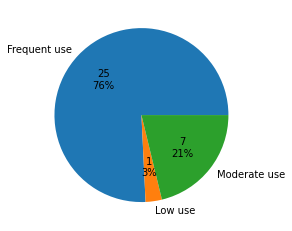

In [19]:
def label_function(val):
    return f'{val / 100 * len(daily_activity_wide):.0f}\n{val:.0f}%'
daily_activity_wide.groupby('Device Use').size().plot(kind='pie', autopct=label_function)

In [20]:
df = pd.DataFrame(daily_activity.groupby('Id').size())
df.columns = ['Days']

In [21]:
PE_Conditions = [
    (df['Days'] <= 10),
    (df['Days'] > 10) & (df['Days'] <= 20),
    (df['Days'] >= 21)
]
PE_Categories = ['Low use', 'Moderate use', 'Frequent use']
df['Device Use'] = np.select(PE_Conditions, PE_Categories)

<AxesSubplot: >

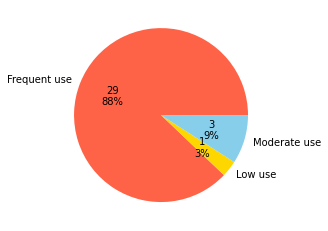

In [22]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby('Device Use').size().plot(kind='pie', autopct=label_function,
                                  colors=['tomato', 'gold', 'skyblue'])

##### How many hours at a time users wore their device

In [124]:
df = merged.groupby(['Id', 'Date']).size().to_frame().reset_index()
df.columns = ['Id', 'ActivityDate', 'Hours']
df.groupby('Id').Hours.mean()

Id
1503960366    23.900000
1624580081    23.741935
1644430081    23.600000
1844505072    23.580645
1927972279    23.741935
2022484408    23.741935
2026352035    23.741935
2320127002    23.709677
2347167796    23.000000
2873212765    23.741935
3372868164    23.600000
3977333714    24.000000
4020332650    23.612903
4057192912    22.000000
4319703577    23.354839
4388161847    23.709677
4445114986    23.709677
4558609924    23.741935
4702921684    23.580645
5553957443    23.548387
5577150313    23.600000
6117666160    23.571429
6290855005    23.750000
6775888955    23.461538
6962181067    23.612903
7007744171    23.115385
7086361926    23.645161
8053475328    23.709677
8253242879    23.944444
8378563200    23.709677
8583815059    23.933333
8792009665    24.000000
8877689391    23.709677
Name: Hours, dtype: float64

- Most of the users are wearing their device throughout the day

### Most Popular Age Group

##### Checking which age group uses fitness devices more
- We are assuming that there was no bias when selecting participants that use fitness trackers

<AxesSubplot: ylabel='Frequency'>

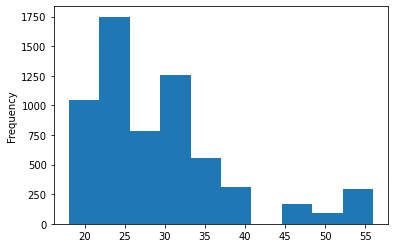

In [128]:
aw_fb_data.age.plot(kind='hist')

- Since we do not have participant Id's we could not group them before plotting, but since each participant went through the same tests, our plot gives an idea of the age distribution correctly
- We can see that majority of fitness device users fall between 20-40 age group

##### Checking how many users logged in Sleep Activity
We will use the Sleep_day Data to see how many users slept with their device on, with the same categorization as the previous analysis

<AxesSubplot: >

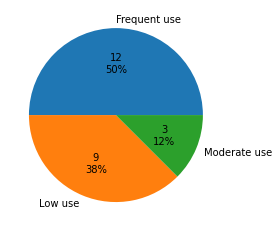

In [97]:
df = pd.DataFrame(sleep_day.groupby('Id').size())
df.columns = ['Days']
PE_Conditions = [
    (df['Days'] <= 10),
    (df['Days'] > 10) & (df['Days'] <= 20),
    (df['Days'] >= 21)
]
PE_Categories = ['Low use', 'Moderate use', 'Frequent use']
df['Device Use'] = np.select(PE_Conditions, PE_Categories)
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
df.groupby('Device Use').size().plot(kind='pie', autopct=label_function)

- We can see that a lot less users log in sleep data compared to daily activities logs

## Further Possible Analysis:

##### Checking the time and days users wear their devices the most

##### Categorize users based on their daily steps and check which type of users (active, moderately active, sedentory)